# <span style="color:green"> Numerical Simulation Laboratory </span>
## <span style="color:brown"> Python Exercise 11 </span>
## <span style="color:orange"> Keras - Neural Network regression </span>

### Overview

In this notebook our task will be to perform machine learning regression on noisy data with a Neural Network (NN).

We will explore how the ability to fit depends on the structure of the NN. The goal is also to build intuition about why prediction is difficult.

### The Prediction Problem

Consider a probabilistic process that gives rise to labeled data $(x,y)$. The data is generated by drawing samples from the equation

$$
    y_i= f(x_i) + \eta_i,
$$

where $f(x_i)$ is some fixed, but (possibly unknown) function, and $\eta_i$ is a Gaussian, uncorrelate noise variable such that

$$
\langle \eta_i \rangle=0 \\
\langle \eta_i \eta_j \rangle = \delta_{ij} \sigma
$$

We will refer to the $f(x_i)$ as the **true features** used to generate the data.

To make predictions, we will consider a NN that depends on its parameters, weights and biases. The functions that the NN can model respresent the **model class** that we are using to try to model the data and make predictions.

To learn the parameters of the NN, we will train our models on a **training data set** and then test the effectiveness of the NN on a *different* dataset, the **validation data set**. The reason we must divide our data into a training and test dataset is that the point of machine learning is to make accurate predictions about new data we have not seen.

To measure our ability to predict, we will learn our parameters by fitting our training dataset and then making predictions on our test data set. One common measure of predictive  performance of our algorithm is to compare the predictions,$\{y_j^\mathrm{pred}\}$, to the true values $\{y_j\}$. A commonly employed measure for this is the sum of the mean square-error (MSE) on the test set:
$$
MSE= \frac{1}{N_\mathrm{test}}\sum_{j=1}^{N_\mathrm{test}} (y_j^\mathrm{pred}-y_j)^2
$$

We will try to get a qualitative picture by examining plots on validation and training data.

### Linear fit

We start by considering the very simple case:
$$
f(x)=2x+1
$$

Let's start defining the parameters of an ideal linear function which we are going to predict through a neural network regression

In [ ]:
# target parameters of f(x) = m*x + b
m = 2 # slope
b = 1 # intersect

Now let's generate a set of input data which will slightly deviate from our ideal behaviour using a random noise (that actually is set to zero):

In [ ]:
import numpy as np

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 500) # ORIGINARIAMENTE 500 PUNTI
x_valid = np.random.uniform(-1, 1, 50)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

sigma = 0.0 # noise standard deviation, for the moment it is absent (AUMENTARE IL NOISE PEGGIORA IL MODELLO OVVIAMENTE)
y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)

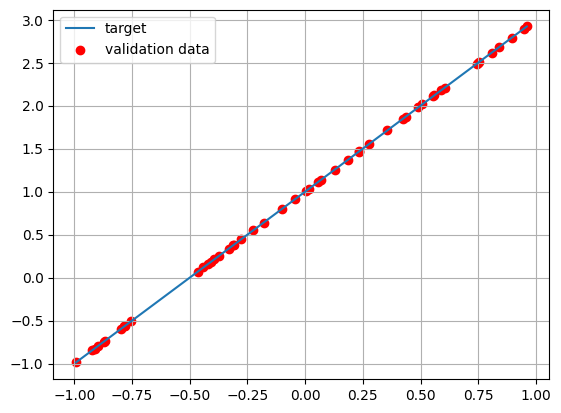

In [ ]:
# plot validation and target dataset
import matplotlib.pyplot as plt
plt.plot(x_valid, y_target, label='target')
plt.scatter(x_valid, y_valid, color='r', label='validation data')
plt.legend()
plt.grid(True)
plt.show()

If you remember how a single node of a neural network works, you can easily spot that **just a single neuron can make the job**. So let's start using a simple Sequential model with just one layer on one neuron only!

In [ ]:
# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

In [ ]:
# get a summary of our composed model
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

We are now going to train our model, that is we feed the neuron with the set of training pair x, y_train from which the optimizer will find the best weights to minimize the Mean Square Error loss function (out linear regression function).

In [ ]:
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train,
          batch_size=32, epochs=30, # ORIGINARIAMENTE 30
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Epoch 1/30
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.1362 - mse: 0.1362 - val_loss: 1.2189e-11 - val_mse: 1.2189e-11
Epoch 2/30
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 1.1878e-11 - mse: 1.1878e-11 - val_loss: 1.2189e-11 - val_mse: 1.2189e-11
Epoch 3/30
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 1.0930e-11 - mse: 1.0930e-11 - val_loss: 1.0386e-11 - val_mse: 1.0386e-11
Epoch 4/30
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 1.0095e-11 - mse: 1.0095e-11 - val_loss: 1.0387e-11 - val_mse: 1.0387e-11
Epoch 5/30
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 1.0069e-11 - mse: 1.0069e-11 - val_loss: 1.0387e-11 - val_mse: 1.0387e-11
Epoch 6/30
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 1.0058e-11 - mse: 1.0058e-11 - val_loss: 1.0387e-11 - val_mse: 1.0387e-11
Epoch 7/30
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 9.7389e-12 - mse: 9.7389e-12 - val_loss: 9.9053e-12 - val_mse: 9.9053e-12
Epoch 8/30
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step -

By looking at weights and biases we can see if the linear fit was successfull: $w_1$ represents the angular coefficient, $b$ the intercept.

In [ ]:
# return weights and biases
model.get_weights()

[array([[1.9999948]], dtype=float32), array([0.99999994], dtype=float32)]

In [ ]:
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 8.8500e-12 - mse: 8.8500e-12

Test loss: 9.472277129329854e-12
Test accuracy: 9.472277129329854e-12


In [ ]:
# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 8.8500e-12 - mse: 8.8500e-12

Test loss: 9.472277129329854e-12
Test accuracy: 9.472277129329854e-12


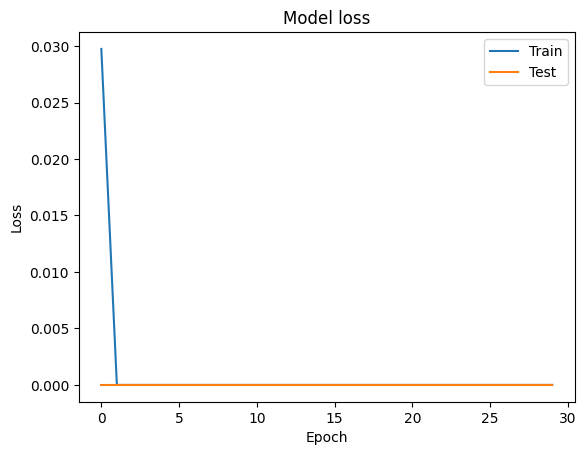

In [ ]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


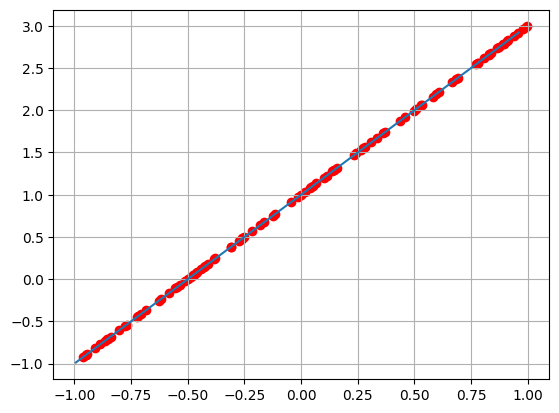

In [ ]:
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()

### Exercise 11.1

In order to make practice with NN, explore how does the previous linear regression depend on the number of epochs, $N_{\mathrm{epochs}}$, the number of data points $N_{\mathrm{train}}$ and on the noise $\sigma$. Try to improve the previous result operating on these parameters.

### Commenti
L'incremento del rumore nei dati di addestramento tende a deteriorare le performance predittive del modello. Un maggior numero di epoche di addestramento generalmente migliora la capacità del modello di apprendere i pattern nei dati, portando a una diminuzione dell'errore, fino a un certo punto. L'aumento della dimensione del dataset di addestramento è il fattore più efficace per migliorare la generalizzazione del modello, sebbene ciò implichi un maggiore peso computazionale. È importante notare che un addestramento eccessivo (overfitting) può portare il modello a specializzarsi eccessivamente sui dati di addestramento, compromettendo la sua capacità di generalizzare su dati non visti e risultando in performance peggiori sul set di validazione.

### Exercise 11.2

Try to extend the model to obtain a reasonable fit of the following polynomial of order 3:

$$
f(x)=4-3x-2x^2+3x^3
$$
for $x \in [-1,1]$.

Find good (& reasonable) choices for:

- the number of layers
- the number of neurons in each layer
- the activation function
- the optimizer
- the loss function
  
Check your NN model by seeing how well your fits predict newly generated test data (including on data outside the range you fit. How well do your NN do on points in the range of $x$ where you trained the model? How about points outside the original training data set?
Summarize what you have learned about the relationship between model complexity (number of parameters), goodness of fit on training data, and the ability to predict well.

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 6.8191 - mse: 6.8191 - val_loss: 1.0859 - val_mse: 1.0859
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6979 - mse: 0.6979 - val_loss: 0.8821 - val_mse: 0.8821
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5724 - mse: 0.5724 - val_loss: 0.8498 - val_mse: 0.8498
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5163 - mse: 0.5163 - val_loss: 0.7848 - val_mse: 0.7848
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4862 - mse: 0.4862 - val_loss: 0.7472 - val_mse: 0.7472
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5148 - mse: 0.5148 - val_loss: 0.7371 - val_mse: 0.7371
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4711 - mse: 0.4711 - val_loss: 0.6630 - val_mse: 0.6630
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4141 - mse: 0.4141 - val_loss: 0.6568 - val_mse: 0.6568
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.42

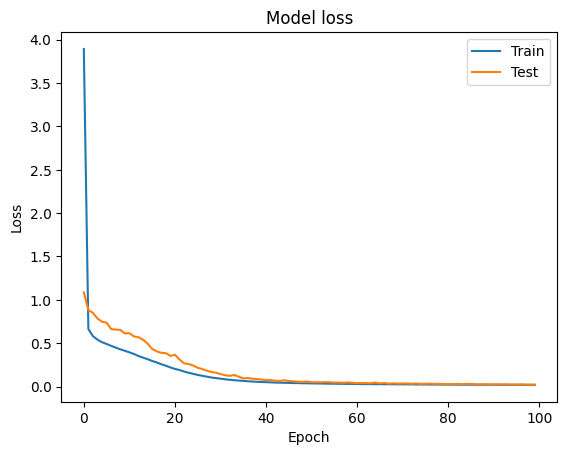

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


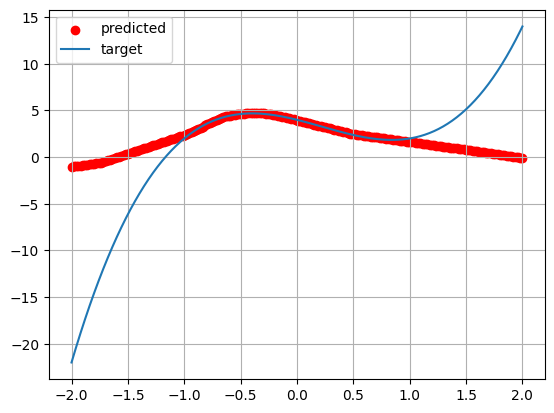

In [ ]:
# Definisco innanzitutto la funzione "target" da raggiungere
def f(x):
    return 4 - 3*x - 2*x**2 + 3*x**3

# Genero gli input di training come sopra, cioè con distribuzione uniforme
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 1000) # Inizialmente fisso 1000 punti
x_valid = np.random.uniform(-1, 1, 100)
x_valid.sort()
y_target = f(x_valid) # Funzione polinomiale target

sigma = 0.1 # Non lo metto nullo, inizialmente 0.1
y_train = np.random.normal(f(x_train), sigma)
y_valid = np.random.normal(f(x_valid), sigma)

# Costruisco il modello NN
# Visto che le relazioni da apprendere non sono più lineari, provo ad implementare due hidden layers
# con 10 neuroni cadauno.
model = tf.keras.Sequential()
model.add(Dense(10, input_shape=(1,), activation='relu')) # Primo strato con attivazione ReLU
model.add(Dense(10, activation='relu')) # Secondo strato nascosto con attivazione ReLU
model.add(Dense(1)) # Strato di output lineare

# Compilo il modello
model.compile(optimizer='sgd', loss='mse', metrics=['mse']) # Usiamo l'ottimizzatore sgd e la loss MSE

# Posso partire con il fit del modello, come sopra praticamente
history = model.fit(x=x_train, y=y_train,
          batch_size=32, epochs=100, # Parto da 100 epoche
          shuffle=True, # Mantengo lo shuffle visto che mi sembrava una scelta intelligente
          validation_data=(x_valid, y_valid))

# Valuto il modello con la funzione apposita
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# Plotting della loss per training e validation
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

# Plotting delle predizioni (per comodità inserisco i due estremi come parametri)
lower_bound = -2
upper_bound = 2
x_predicted = np.linspace(lower_bound, upper_bound, 200) # Posso estendere l'intervallo per testare al di fuori del range di training
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted, color='r', label='predicted')
plt.plot(np.linspace(-2, 2, 200), f(np.linspace(lower_bound, upper_bound, 200)), label='target') # Plotting della funzione target nell'intervallo scelto
plt.grid(True)
plt.legend()
plt.show()

### Analisi dei risultati
Dai grafici ottenuti, possiamo osservare quanto segue:

Grafico della loss:
Entrambe le curve di loss mostrano un andamento decrescente con l'aumentare delle epoche. Questo indica che il modello sta imparando e riducendo l'errore sia sui dati di addestramento che su quelli di validazione.
La loss sul set di validation segue da vicino la loss sul set di training, il che suggerisce che il modello non sta soffrendo di un overfitting eccessivo sui dati di addestramento. Se ci fosse overfitting significativo, la loss di training continuerebbe a diminuire mentre quella di validation inizierebbe a risalire o si stabilizzerebbe a un valore significativamente più alto.
Dopo un certo numero di epoche (intorno alle 50-60 epoche), la diminuzione della loss diventa meno marcata, suggerendo che il modello si sta avvicinando alla convergenza.
Grafico delle predizioni:
All'interno dell'intervallo di training ([-1, 1]), i punti predetti (rossi) si allineano abbastanza bene con la funzione target (blu). Questo dimostra che la rete neurale è stata in grado di apprendere la relazione non lineare rappresentata dal polinomio di terzo grado.
Al di fuori dell'intervallo di training, si nota una deviazione significativa tra i punti predetti e la funzione target. Questo comportamento è atteso: i modelli di regressione, specialmente le reti neurali semplici, tendono a non generalizzare bene al di fuori del range dei dati su cui sono stati addestrati.

### Exercise 11.3
  
Try to extend the model to fit a simple trigonometric 2D function such as $f(x,y) = \sin(x^2+y^2)$ in the range $x \in [-3/2,3/2]$ and $y \in [-3/2,3/2]$.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.2001 - mse: 0.2001 - val_loss: 0.1213 - val_mse: 0.1213
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1526 - mse: 0.1526 - val_loss: 0.1199 - val_mse: 0.1199
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1496 - mse: 0.1496 - val_loss: 0.1159 - val_mse: 0.1159
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1378 - mse: 0.1378 - val_loss: 0.1117 - val_mse: 0.1117
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1362 - mse: 0.1362 - val_loss: 0.1061 - val_mse: 0.1061
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1271 - mse: 0.1271 - val_loss: 0.0992 - val_mse: 0.0992
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1153 - mse: 0.1153 - val_loss: 0.0939 - val_mse: 0.0939
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1067 - mse: 0.1067 - val_loss: 0.0833 - val_mse: 0.0833
Epoch 9/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/

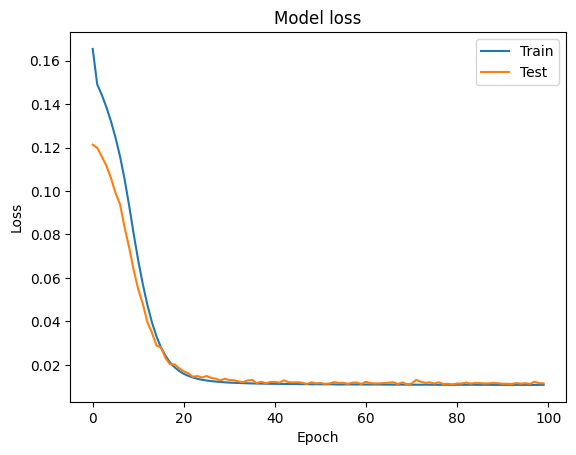

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/tmp/ipython-input-1-114119731.py:85: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap_target = cm.get_cmap('viridis')
/tmp/ipython-input-1-114119731.py:86: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap_predicted = cm.get_cmap('plasma')


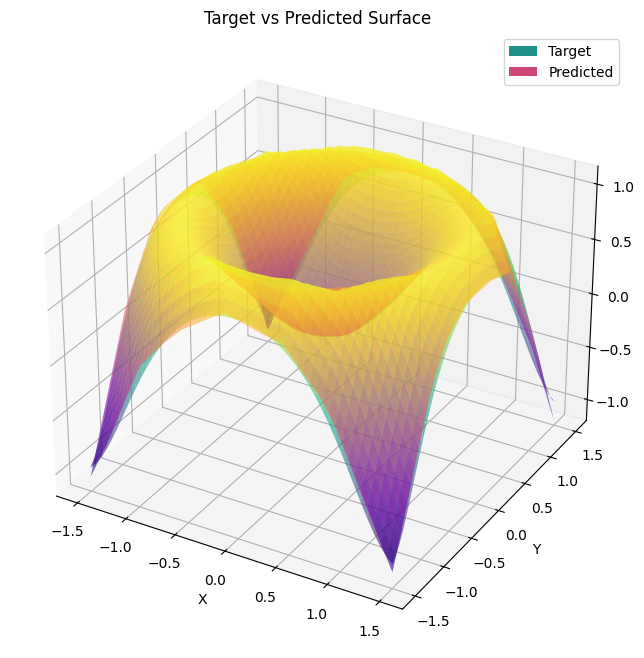

In [1]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import matplotlib.cm as cm # Importo il modulo colormap per evitare problemi nel plotting

# Definisco la funzione target
def f2(x, y):
    return np.sin(x**2 + y**2)

# Genero dati di training e di validation, considerando ovviamente che stavolta ho due variabili
np.random.seed(0)
num_train_points = 10000
num_valid_points = 100
x_train = np.random.uniform(-1.5, 1.5, num_train_points)
y_train_input = np.random.uniform(-1.5, 1.5, num_train_points)
x_valid = np.random.uniform(-1.5, 1.5, num_valid_points)
y_valid_input = np.random.uniform(-1.5, 1.5, num_valid_points)

# Genero funzione di target per il plotting successivo
x_plot = np.linspace(-1.5, 1.5, 50)
y_plot = np.linspace(-1.5, 1.5, 50)
X_plot, Y_plot = np.meshgrid(x_plot, y_plot)
Z_target = f2(X_plot, Y_plot)

sigma = 0.1 # Noise inizalmente fissato a 0.1, come fatto precedentemente
z_train = np.random.normal(f2(x_train, y_train_input), sigma)
z_valid = np.random.normal(f2(x_valid, y_valid_input), sigma)

# Combino gli input di x e y per il modello
xy_train = np.column_stack((x_train, y_train_input))
xy_valid = np.column_stack((x_valid, y_valid_input))

# Costruisco il NN, qui uso due hidden layer e il layer di input ha due neuroni
model = tf.keras.Sequential()
model.add(Dense(20, input_shape=(2,), activation='relu')) # Input layer
model.add(Dense(20, activation='relu')) # Hidden layer
model.add(Dense(20, activation='relu')) # Hidden layer
model.add(Dense(1)) # Output layer

# Compilo il modello
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

# Training del modello
history = model.fit(x=xy_train, y=z_train,
          batch_size=32, epochs=100,
          shuffle=True,
          validation_data=(xy_valid, z_valid))

# Valutazione del modello
score = model.evaluate(xy_valid, z_valid, batch_size=32, verbose=1)
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# Plotting della loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

# Visualizzazione della predizione del modello

# Create a grid of points for plotting predictions
x_pred_grid = np.linspace(-1.5, 1.5, 50)
y_pred_grid = np.linspace(-1.5, 1.5, 50)
X_pred_grid, Y_pred_grid = np.meshgrid(x_pred_grid, y_pred_grid)
xy_pred_grid = np.column_stack((X_pred_grid.flatten(), Y_pred_grid.flatten()))

# Predict z-values using the trained model
Z_predicted = model.predict(xy_pred_grid)
Z_predicted = Z_predicted.reshape(X_pred_grid.shape) # Reshape to match grid dimensions

# Plot the target and predicted surfaces
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Definisco le colormap da usare per la legenda
cmap_target = cm.get_cmap('viridis')
cmap_predicted = cm.get_cmap('plasma')

ax.plot_surface(X_plot, Y_plot, Z_target, cmap=cmap_target, alpha=0.6)
ax.plot_surface(X_pred_grid, Y_pred_grid, Z_predicted, cmap=cmap_predicted, alpha=0.6)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Target vs Predicted Surface')

# Add a legend manually
# Sample a color from the colormaps for the legend patches
legend_elements = [Patch(facecolor=cmap_target(0.5), label='Target'), # Sample color at 0.5 (middle)
                   Patch(facecolor=cmap_predicted(0.5), label='Predicted')] # Sample color at 0.5 (middle)

ax.legend(handles=legend_elements)

plt.show()

### Analisi dei risultati

Grafico della loss:
Anche in questo caso, le curve di loss per il training e la validation mostrano una chiara tendenza decrescente all'aumentare delle epoche. Questo è un buon segnale che la rete neurale sta imparando a ridurre l'errore nel predire i valori di $z$$z$ dati $x$$x$ e $y$$y$.
Le due curve di loss si muovono in modo abbastanza sincrono e convergono verso valori bassi. Questo suggerisce che il modello sta apprendendo efficacemente e, almeno all'interno del range di training, non sembra esserci un overfitting significativo, poiché la performance sul set di validazione non si discosta eccessivamente da quella sul set di training.
La diminuzione della loss diventa meno pronunciata dopo un certo numero di epoche, indicando che il processo di addestramento si sta stabilizzando.
Grafico della funzione:
Il grafico 3D confronta la superficie target (la funzione $\sin(x^2+y^2)$$\sin(x^2+y^2)$) con la superficie predetta dal modello.
All'interno del range di training ([-1.5, 1.5] per x e y), si può osservare visivamente che la superficie predetta (in arancione/giallo) si sovrappone abbastanza bene alla superficie target (in verde/blu). Questo dimostra che l'architettura della rete neurale scelta (con più neuroni e hidden layers rispetto al caso 1D) e i parametri di training sono stati sufficientemente efficaci per apprendere la forma complessa e non lineare della funzione seno bidimensionale all'interno del dominio di addestramento.



Ideas to meditate on these exercises and judge your results can be found <a href=https://xkcd.com/2048/>here</a>